In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [15]:
%matplotlib inline

In [16]:
df = pd.read_csv('Ecommerce Customers')

In [17]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [18]:
df.corr()['Yearly Amount Spent'].sort_values()

Time on Website        -0.002641
Avg. Session Length     0.355088
Time on App             0.499328
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

In [19]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [22]:
y = df['Yearly Amount Spent']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
predictions = model.predict(X_test)

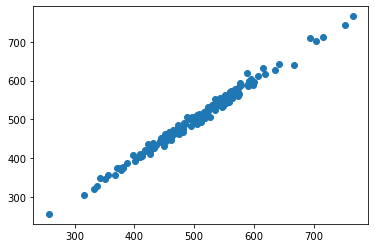

In [29]:
plt.scatter(predictions,y_test)

/home/lalwani/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

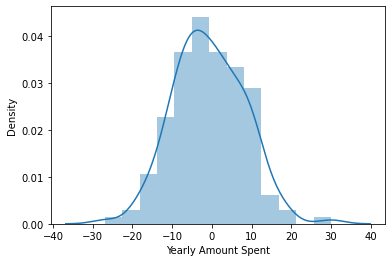

In [51]:
sns.distplot((y_test-predictions))

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [32]:
mean_absolute_error(y_test,predictions)

7.228148653430847

In [33]:
mean_squared_error(y_test,predictions)

79.81305165097461

In [34]:
explained_variance_score(y_test,predictions)

0.9890771231889607

In [47]:
coefficient_data = pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])

In [48]:
coefficient_data

,coefficient
Avg. Session Length,139.461160
Time on App,224.498355
Time on Website,0.989291
Length of Membership,375.722225


# Conclusion 
For every hour spent more on the app the yearly sales go up $224 where for every hour on the website only increases the revenue by at most $1